# Ön Hazırlık LAB-4

## Ad Soyad: Berker Boyacı
## Öğrenci No: 131024068

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
import zplane

%matplotlib notebook




#plt.plot(w/np.pi , abs(H) )
#plt.title('Frequency Response of $H(z)$')
#plt.ylabel('Magnitude')
#plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
#plt.grid()
#print(help(sgnl.zpk2tf))
#print(help(sgnl.freqz))

# num , denum = sgnl.zpk2tf(zeros , poles , 1)

# w1 , H_tf   = sgnl.freqz( num , denum )

# plt.figure()
# plt.plot(w1/np.pi, abs(H_tf))
# plt.title('Frequency Response of $H(z)$')
# plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
# plt.grid()

# n = np.arange(0 , 40 , 1)
# xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n)

# yn = sgnl.lfilter(num , denum , xn)

# plt.figure()
# plt.stem(n , yn , use_line_collection = "True")

# zeross = np.array([-1])
# poless = np.array([-1j/2, 1j/2, -1/4])
# k = 1

# b , a = sgnl.zpk2tf(zeross , poless , k )
# zplane.zplane(b , a)


# num = np.array([1, 0, 1])
# denum = np.array([1, -1.0/2])

# zplane.zplane(num, denum)

# w = np.linspace(0, 2*np.pi, 100)

# Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
# Hw_abs = abs(Hw)

# plt.figure()
# plt.plot(w/np.pi, Hw_abs)
# plt.grid()
# plt.xlabel('$\omega$ x$\pi$ rad/sample')


# Soru-1

# A-)

Sistem fonksiyonunu el ile hesaplandığında 


H(z) =$\frac{ 1 \quad + 2/3z^{-1 } \quad + 1/9z^{-2 } }
            { 1 \quad - {1/2}z^{-1 } \quad + 4z^{-2 } \quad + 2z^{-3 } }$
            
 bulunur.
 
 Kutup-sıfırları bulmak için 
 
 H(z) =$\frac{  (\,\,{1 + 2/3z\,^{-1 }}\,\,) \,\, ^{2} }
            { (\,\,{1 - 1/2 z\,^{-1 }}\,\,)(\,\,{1 + 4z\,^{-2 }}\,\,)  }$
            
 olarak yazılabilir. 
 Sistemin kutupları : 0.5 , 2i , -2i 
 Sistemin sıfırları : -1/3 , -1/3

# B-)

<IPython.core.display.Javascript object>


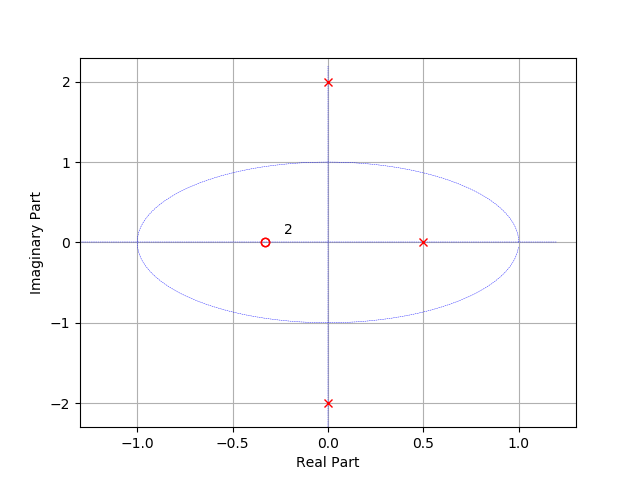

In [44]:
num   = np.array([ 1 , 2.0/3 , 1.0/9])
denum = np.array([ 1 ,-1.0/2 , 4 , -2])


zplane.zplane(num , denum)


# C -)

### C.1)

h[n] = 0, n < 0 ise sistem nedenseldir. Nedensel sistem olduğu için ROC en dıştaki kutuptan dışarı doğru olur. 

ROC :  |z| > 2 

### C.2)

Sistemin fourieri varsa sistem kararlıdır. ROC birim çemberi kapsaması gerektiğinden 

ROC :  0.5 < |z| < 2 olur.

# D -)

<IPython.core.display.Javascript object>


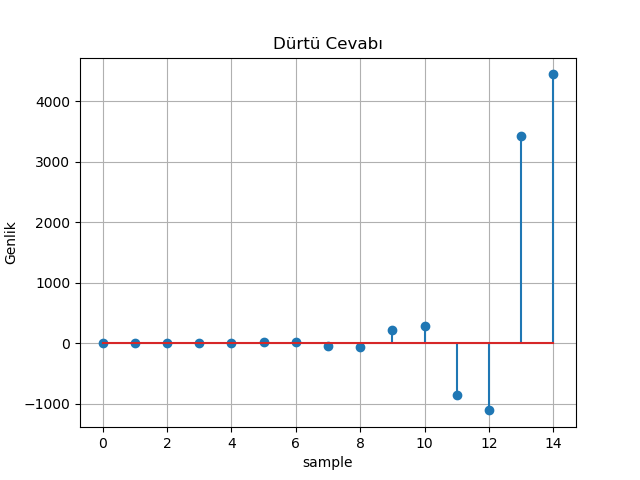

In [45]:
n , x = sgnl.dimpulse(( num , denum , 1 ) , n = 15 )

plt.figure()
plt.stem( n, np.squeeze(x) , use_line_collection="True")
plt.title('Dürtü Cevabı')
plt.ylabel('Genlik')
plt.xlabel('sample')
plt.grid()

sistem mutlak toplanabilir olmadığından dolayı kararlı değildir.

# E -) 

   ROC'lar kesişmediğinden sistem hem kararlı hem nedensel olamaz. Sistemin hem kararlı hem nedensel yapılabilmesi için ROC sağ yönlü ve birim çemberi kapsamalı. 
    Bu şartları sağlayabilmesi için +2i ve -2i'ye sıfır eklenirse sıfır-kutup elemesi ile +-2i'deki kutuplar silinir.Bu işlemden sonra ROC |z| > 0.5 olduğundan hem kararlı hem nedenseldir.

  +2i ve -2i 'ye sıfır eklemek için sistem fonksiyonunun payı 
  $\frac{1+4z^{-2}}{}$ 
  ile çarpılır. İşlem sonrası sistem fonksiyonu 
   H(z) =$\frac{  (\,\,{1 + 2/3z\,^{-1 }}\,\,) \,\, ^{2} }
            { (\,\,{1 - 1/2 z\,^{-1 }}\,\,)  }$
            
 olur.

# F-)

Kutup-Sıfır diyagramı :

<IPython.core.display.Javascript object>


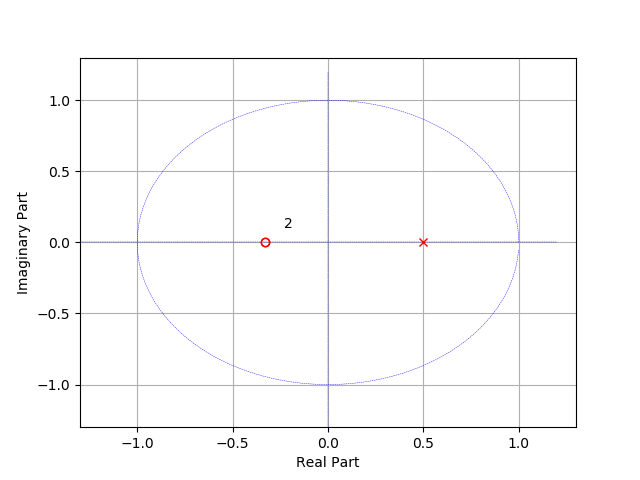

In [46]:
num1   = np.array([ 1 , 2.0/3 , 1.0/9  ])
denum1 = np.array([ 1 ,-1.0/2 ])

zplane.zplane(num1 , denum1)


Dürtü cevabı :

<IPython.core.display.Javascript object>


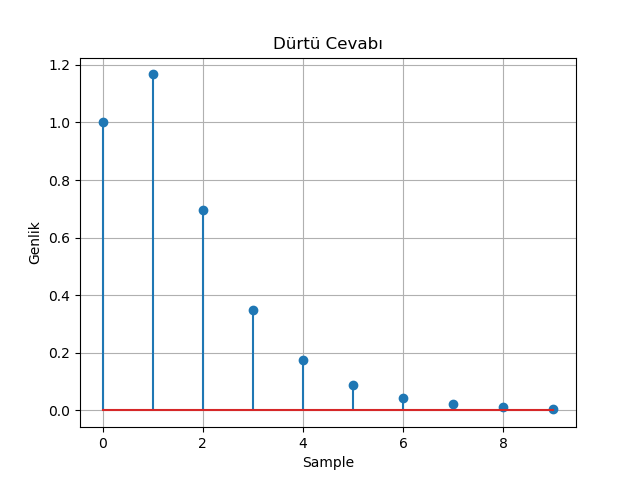

In [47]:


num2   = np.array([ 1 , 2.0/3 , 1.0/9  ])
denum2 = np.array([ 1 ,-1.0/2 , 0])



n1 , y1 = sgnl.dimpulse(( num2 , denum2 , 1 ) , n = 10 )

plt.figure()
plt.stem( n1, np.squeeze(y1) , use_line_collection="True")
plt.title('Dürtü Cevabı')
plt.ylabel('Genlik')
plt.xlabel('Sample')
plt.grid()


<IPython.core.display.Javascript object>


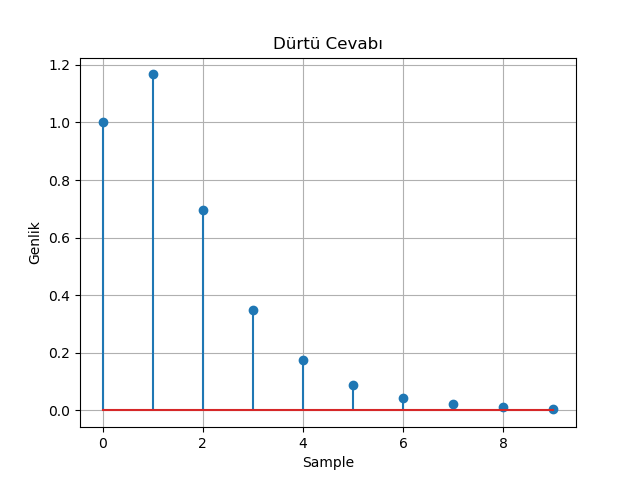

In [48]:
n = np.arange(0, 10, 1)

dirac  =  np.zeros(10)
dirac[0]= 1

h_n = sgnl.lfilter(num1, denum1, dirac )
plt.figure()
plt.stem(n, h_n ,use_line_collection='True')
plt.title('Dürtü Cevabı')
plt.ylabel('Genlik')
plt.xlabel('Sample')
plt.grid()

Kutup-sıfır elemesi yapılmadan önce sistem eşlenik kutuplara sahipti. Eşlenik kutba sahip sistemler için kutbun orjin noktasından uzaklığını temsil eden r sinüzoidal sinyalin zarfını , açı ise sinyalin bağıl frekansını belirler. 

Sistemin r'si birden büyük olduğundan dolayı büyüyen bir sinyale sahiptir. Sistem büyüyen bir sinyale sahip olduğundan mutlak toplanabilir dolayısıyla kararlı değildir.

Kutup-sıfırelemesi yapıldıktan sonra sistemin kutbu birim çember içerisinde olduğu için sinyal zamanla zayıflar. Bundan dolayı sistem mutlak toplanabilir olduğundan kararlıdır.

# G-)

<IPython.core.display.Javascript object>


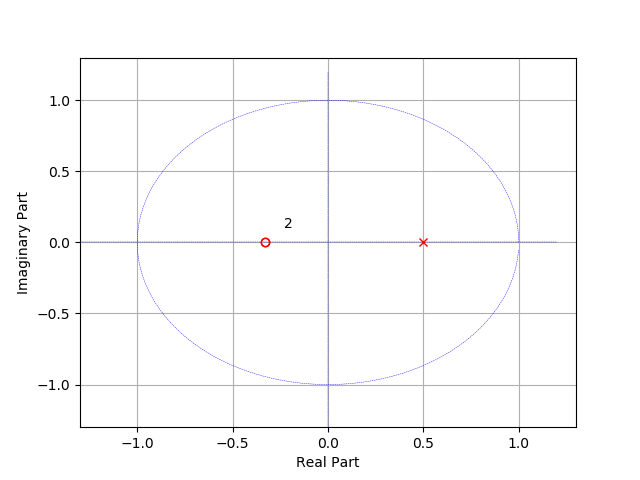

In [49]:
num1   = np.array([ 1 , 2.0/3 , 1.0/9  ])
denum1 = np.array([ 1 ,-1.0/2 ])

zplane.zplane(num1 , denum1)

   Sistemin kutbu, frekans cevabının genliğini dahada yükseltir. Sıfır ise genliği düşürür. Frekans cevabının genliği çizdirilirken başlanan noktada kutup olduğu için en yüksek genlikten başlar. Birim çemberde saat tersi yönde ilerledikçe genlik azalır. 

   pi kadar ilerlendiğinde sıfırlar olduğundan dolayı en düşük genlik noktasına ulaşılır.Kutup-sıfır diyagramına bakılarak kesim frekansının pi'de olduğu görülür.

<IPython.core.display.Javascript object>


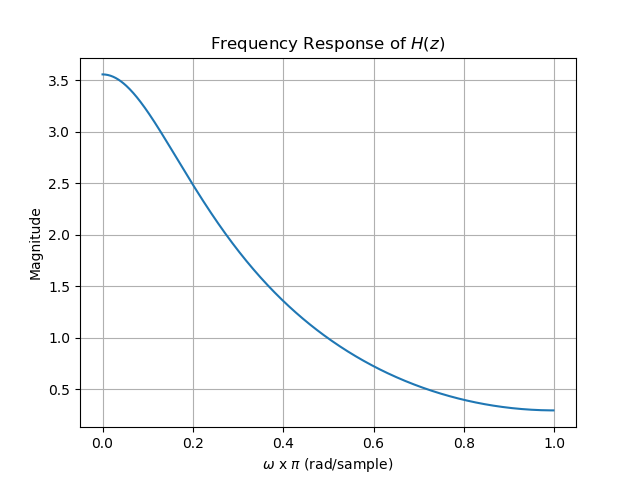

In [50]:

num3   = np.array([ 1 , 2.0/3 , 1.0/9  ])
denum3 = np.array([ 1 ,-1.0/2 , 0])

w1 , H_tf   = sgnl.freqz( num3 , denum3 )



plt.figure()
plt.plot(w1/np.pi, abs(H_tf))
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude')
plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()